In [1]:
from ml_config import *

In [2]:
sample = pd.read_csv('../data/01. final_sample', index_col = 0)

In [3]:
store_month = sample.pivot_table(index=['year','month'],columns='store_nbr',values='units',aggfunc=np.sum)

In [4]:
sales = pd.read_csv('../data/train.csv', parse_dates=['date'])
keys = pd.read_csv('../data/key.csv')
weather = pd.read_csv('../data/weather.csv', parse_dates=['date'])
df_1 = pd.merge(weather, keys)
df_1 = pd.merge(df_1, sales)

dates = df_1['date'].dt
df_1['year'] = dates.year
df_1['month'] = dates.month
df_1['day'] = dates.day

In [5]:
def find_store(station_nbr):
    '''
    input : station_nbr
    output : store_nbrs dependent to station_nbr
    '''
    
    station = df_1[df_1['station_nbr']==station_nbr]
    return station['store_nbr'].unique()

In [6]:
def item_nbr_tendency(store_nbr):
    '''
    input : store_nbr
    output : item_nbr heatmap for each year
    '''
    
    store = df_1[df_1['store_nbr'] == store_nbr]

    store = store[store['units'] != 0]

    store_2012 = store[store['year'] == 2012]
    store_2013 = store[store['year'] == 2013]
    store_2014 = store[store['year'] == 2014]

    pivot_2012 = store_2012.pivot_table(index=['month'], columns=['item_nbr'],values='units').fillna(value=0).astype(int)
    pivot_2013 = store_2013.pivot_table(index=['month'], columns=['item_nbr'],values='units').fillna(value=0).astype(int)
    pivot_2014 = store_2014.pivot_table(index=['month'], columns=['item_nbr'],values='units').fillna(value=0).astype(int)
    
    plt.figure(figsize=(12,8))
    plt.subplot(131)
    sns.heatmap(pivot_2012,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.subplot(132)
    sns.heatmap(pivot_2013,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.subplot(133)
    sns.heatmap(pivot_2014,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.show()

In [7]:
df_1.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,store_nbr,item_nbr,units,year,month,day
0,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,1,1,0,2012,1,1
1,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,1,2,0,2012,1,1
2,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,1,3,0,2012,1,1
3,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,1,4,0,2012,1,1
4,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,1,5,0,2012,1,1


In [8]:
# 7번 가게의 13, 14년도 5월에서 9월까지가 비슷함
store_7 = df_1[df_1['store_nbr']==7]

In [9]:
station_6 = df_1[df_1['station_nbr'] == 6]
station_6['store_nbr'].unique()
# 6번 관측소는 7번, 13번 지점을 관리한다

array([ 7, 13], dtype=int64)

In [10]:
# 7번 13번 지점의 2013년, 2014년 units그래프가 비슷하다
# 다만 7번은 13,14년과 12년 그래프가 붙어있는 반면
# 13번은 13,14년과 12년 그래프가 떨어져있다
# 일단 item_nbr로 13, 14년도에 뭐가 팔렸는지 조사함
store_13 = df_1[df_1['store_nbr'] == 13]

# store_7 = store_7[store_7['units']!=0]
# store_7 = store_7[(store_7['year']==2013) | (store_7['year']==2014)]

store_7 = store_7[(store_7['year'] == 2013) | (store_7['year'] == 2014)]
store_7 = store_7[store_7['units'] != 0]

store_13 = store_13[(store_13['year'] == 2013) | (store_13['year'] == 2013)]
store_13 = store_13[store_13['units'] != 0]

store_7['item_nbr'].unique(), store_13['item_nbr'].unique()

(array([ 5,  7, 23, 93, 95], dtype=int64),
 array([  5,  36,  93, 104], dtype=int64))

# 13, 14년도
# 7번, 13번 가게에서
# 5번, 93번 아이템이 동시에 팔림

In [11]:
final_sample = pd.read_csv('../data/01. final_sample')
trimmed = final_sample.iloc[:, 1:]
store_7 = trimmed[trimmed['store_nbr'] == 7].reset_index(drop=True)

a = store_7[(store_7['year'] == 2013) & (
    5 <= store_7['month']) & (store_7['month'] <= 9)]
b = store_7[(store_7['year'] == 2014) & (
    5 <= store_7['month']) & (store_7['month'] <= 9)]

In [12]:
a.head()

,year,month,day,store_nbr,station_nbr,codesum,units
475,2013,5,3,7,6,,87
476,2013,5,4,7,6,,64
477,2013,5,5,7,6,,142
478,2013,5,6,7,6,RA,151
479,2013,5,14,7,6,BR,107


1. x = day
2. y = units
3. hue = codesum

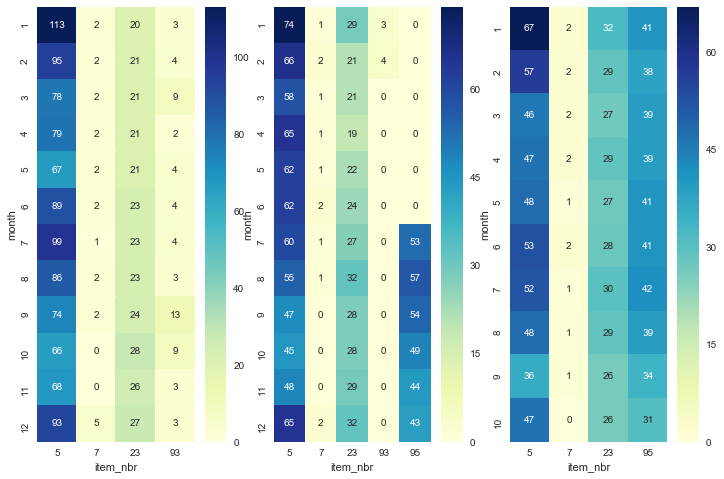

In [13]:
item_nbr_tendency(7)

In [15]:
store_7 = df_1[df_1['store_nbr']==7]

In [34]:
def show_codesum(store_nbr, year, month):
    final_sample = pd.read_csv('../data/01. final_sample')
    trimmed = final_sample.iloc[:, 1:]

    return trimmed[(trimmed['year'] == year) & (trimmed['store_nbr'] == store_nbr) & (trimmed['month'] == month)]

In [80]:
df_1 = df_1[df_1['store_nbr']==7]
df_1 = df_1[df_1['year']==2012]
df_1 = df_1[df_1['month']==1]

tmp = df_1.pivot_table(index='month', columns='item_nbr',values='units',aggfunc=np.sum)
a = tmp[tmp!=0].dropna(axis=1)
a

item_nbr,5,7,23,93
month,,,,
1,3531,61,621,22


In [74]:
trimmed = trimmed[trimmed['year']==2012]
trimmed = trimmed[trimmed['month']==1]
trimmed = trimmed[trimmed['store_nbr']==7]
sum(trimmed['units'])

4235